## Studi Kasus Employee Churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import folium
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('employee_churn.csv')

Analisis Employee Churn adalah sebuah studi terhadap tingkat 'churn' dari karyawan perusahaan. Employee (karyawan) dibilang 'Churn' ketika karyawan tersebut pindah kerja ke kantor lain (berhenti bekerja di kantor asal). Secara garis besar, perusahaan-perusahaan ingin bisa 'memprediksi' employee mana yang akan 'churn', supaya bisa melakukan antisipasi agar employee tersebut tidak jadi 'churn'. Mengapa? Karena...lebih besar ongkos yang dikeluarkan untuk mencari & merekrut karyawan baru, melatih mereka dari 0 lagi, ketimbang mempertahankan employee yang sudah ada. Oleh sebab itu, perusahaan-perusahaan ingin mempelajari faktor-faktor apa saja yang dapat dilihat untuk mengantisipasi 'churn' dari seorang employee. 


Setiap baris merepresentasi data dari seorang employee. 

Penjelasan setiap kolom:
- `office_distance_from_house`: jarak (dalam meter) kantor ke rumah karyawan
- `bonus_salary_percentage`: persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir
- `job_satisfaction`: tingkat kepuasan kerja karyawan
- `education_level`: tingkat pendidikan karyawan
- `overtime_hour`: lama waktu lembur rata-rata (dalam jam)
- `company_latitude`: koordinat garis lintang kantor pusat perusahaan
- `company_longitude`: koordinat garis bujur kantor pusat perusahaan
- `gender`: apabila 0, berarti perempuan, apabila 1, berarti laki-laki
- `churn`: apabila 1, berarti Churn (si karyawan pindah), apabila 0, berarti tidak Churn (karyawan tidak pindah)

### Soal:

1. (30 POIN) Lakukan explorasi dan visualisasi data secara bebas dan tulislah (dalam poin-poin) insights yang Anda peroleh. Berikan minimal 7 poin-poin. 
2. (20 POIN) Lakukanlah data preparation yang diperlukan (misal: mengubah kolom kategorikal menjadi kolom numerikal, dst). Tuliskanlah langkah-langkah yang Anda lakukan dalam tahap ini. 
3. (20 POIN) Tentukan False Positive dan False Negative dari kasus ini. Mana yang lebih 'penting' untuk diperhatikan? Mana yang lebih 'penting' untuk kita hindari? False Positive, atau False Negative? 
4. (30 POIN) Buatlah Machine Learning Model untuk mengklasifikasikan apakah employee akan Churn atau tidak. Kolom 'target' adalah kolom 'Churn'. Evaluasi-lah machine learning model Anda, dan tentukanlah metrik-metrik yang tepat untuk mengukur akurasi dari machine learning model tersebut. 

### Petunjuk:

1. Kerjakanlah pekerjaan kalian di bagian "Tempat Mengerjakan" (di bawah)
2. Jawablah keempat soal di atas di bagian "Jawaban". 

#### Tempat Mengerjakan:

Langkah pertama yang dilakukan adalah melihat dataset secara sekilas menggunakan method head dari pandas.

In [3]:
df.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,1,1


Ukuran dari dataset dapat dilihat dengan shape

In [4]:
df.shape

(1033, 9)

Method describe digunakan untuk melihat statistik 5 serangkai dari peubah numerik. Dalam hal ini, peubah numerik pada dataset yaitu peubah office_distance_from_house, bonus_salary_percentage, overtime_hour, company_latitude dan company_longitude. Peubah job_satisfaction, gender dan churn hanya ditampilkan tetapi tidak dibaca ataupun digunakan karena merupakan peubah kategorik.

Berdasarkan method describe, terlihat bahwa kelima peubah numerik menyebar normal. Hal ini ditandai dengan nilai median dan mean yang tidak terlalu berbeda pada seluruh peubah numerik.

In [5]:
df.describe()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,overtime_hour,company_latitude,company_longitude,gender,churn
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,10771.866409,52.125208,2.482091,3.080121,41.653243,-87.962635,0.499516,0.299129
std,3810.278239,13.624713,0.877098,0.627240,3.705374,8.250586,0.500242,0.458098
min,583.000000,5.000000,0.000000,1.000000,30.000000,-119.646200,0.000000,0.000000
25%,8202.000000,42.600000,2.000000,2.628310,38.942425,-93.153696,0.000000,0.000000
50%,10530.000000,50.980000,3.000000,3.062020,41.557148,-86.857604,0.000000,0.000000
75%,13185.000000,61.730000,3.000000,3.483906,44.144209,-81.745459,1.000000,1.000000
max,24786.000000,95.700000,5.000000,5.000000,55.140000,-66.385462,1.000000,1.000000


Untuk peubah education_level, peubah memiliki tipe data string. Peubah ini diubah representasinya menjadi peubah kategorik dengan tipe data int. 

Nilai high school pada peubah education_level direpresentasikan dengan angka 0, higher education dengan angka 1, bachelor/diploma dengan angka 2 dan masters degree dengan angka 3. Pengubahan tidak dilakukan dengan one hot encoding karena peubah education_level merupakan peubah kategorik bersifat ordinal.

In [6]:
df['education_level'].value_counts()

bachelor/diploma    551
masters degree      463
higher education     11
high-school           8
Name: education_level, dtype: int64

In [7]:
for i in df.index:
    if df['education_level'][i] == 'masters degree':
        df['education_level'][i] = 3
    elif df['education_level'][i] == 'bachelor/diploma':
        df['education_level'][i] = 2
    elif df['education_level'][i] == 'higher education':
        df['education_level'][i] = 1
    else:
        df['education_level'][i] = 0
        

Berikut adalah tampilan dari dataset dengan peubah education_level direpresentasikan dengan tipe peubah int.

In [9]:
df.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,2,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,2,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,2,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,2,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,2,3.812226,41.454702,-81.404655,1,1


# Exploratory Data Analysis

## Pairplot

Berikut merupakan pairplot dari setiap peubah pada dataset.

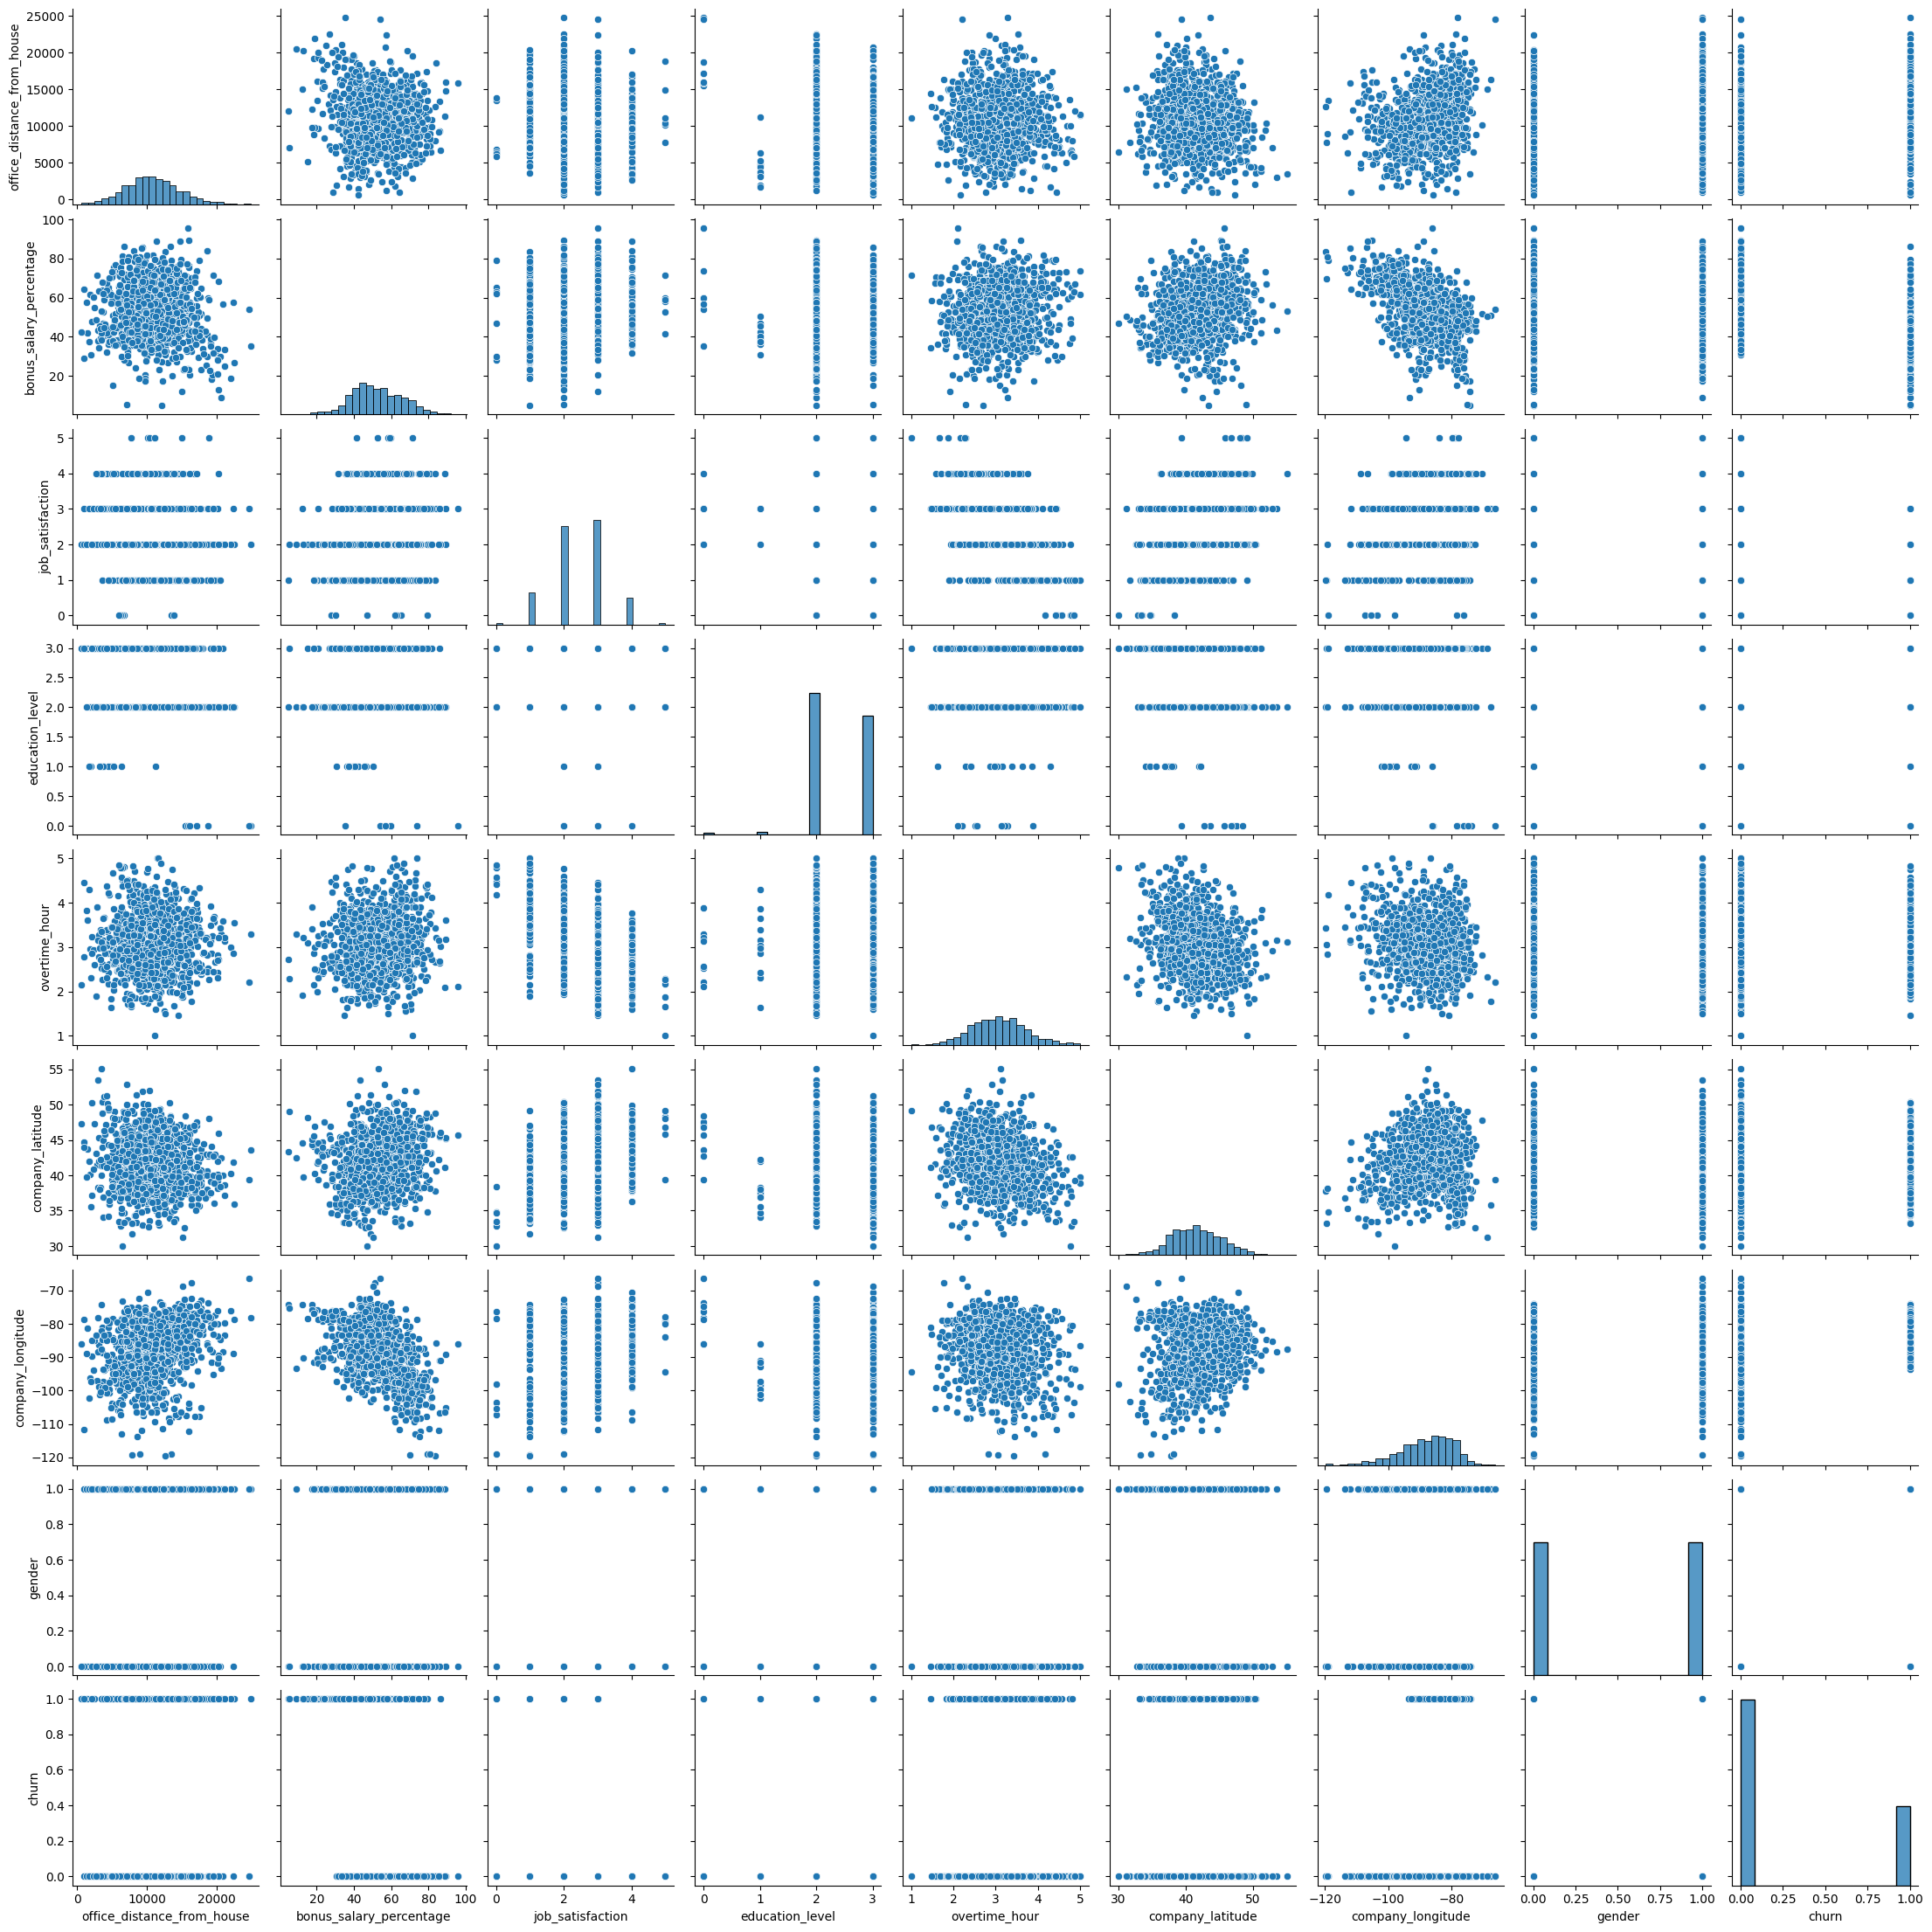

In [8]:
sns.pairplot(df)

Secara visual, berdasarkan pairplot diatas terlihat bahwa terdapat hubungan antar peubah kategorik dan peubah kategorik dengan peubah numerik sebagai berikut:

- Apabila job_satisfaction > 3, maka churn bernilai 0.
- Apabila bonus_salary_percentage berada kurang lebih dibawah 30, maka churn bernilai 1.
- bonus_salary_percentage tertinggi didapatkan oleh karyawan dengan tingkat pendidikan SMA.
- bonus_salary_percentage tertinggi dan terendah didapatkan oleh wanita.
- Semakin tinggi job_satisfaction, semakin rendah rata rata overtime_hour.
- Tidak ada churn bernilai 1 pada company_longitude dibawah -100.

Untuk visualisasi antar peubah numerik, dibuat plot dengan garis regresi untuk menghindari bias asumsi karena visualisasi.

## company_longitude dan bonus_salary_percentage

Pada peubah company_longitude dan bonus_salary_percentage, terdapat hubungan bahwa semakin besar company_longitude maka rata rata bonus_salary_percentage akan semakin menurun.

<AxesSubplot:xlabel='company_longitude', ylabel='bonus_salary_percentage'>

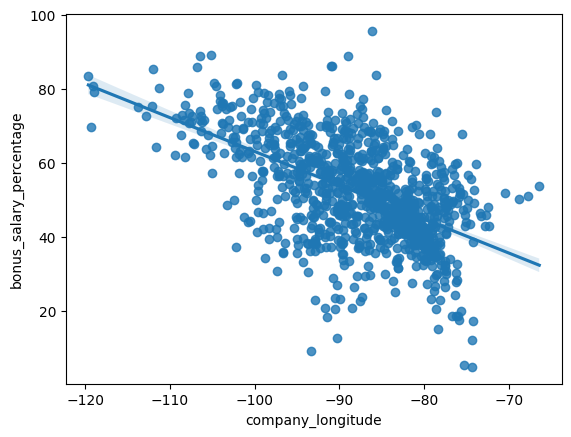

In [10]:
sns.regplot(x = "company_longitude", y = "bonus_salary_percentage", data = df)

## company_latitude dan bonus_salary_percentage

Pada peubah company_latitude dan bonus_salary_percentage, terdapat hubungan bahwa semakin besar company_latitude maka rata rata bonus_salary_percentage akan semakin meningkat.

<AxesSubplot:xlabel='company_latitude', ylabel='bonus_salary_percentage'>

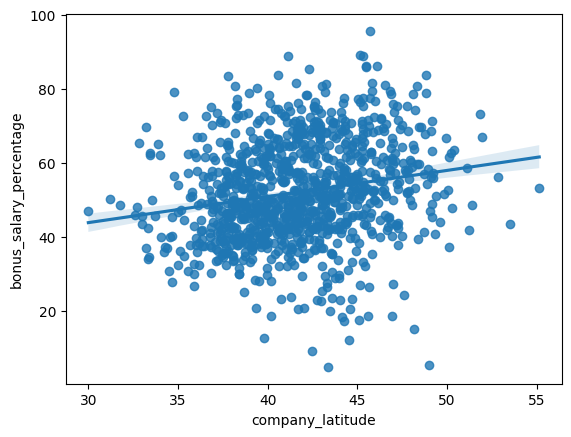

In [15]:
sns.regplot(x = "company_latitude", y = "bonus_salary_percentage", data = df)

## company_longitude dan office_distance_from_house

Pada peubah company_longitude dan office_distance_from_house, terdapat hubungan bahwa semakin besar company_longitude maka rata rata office_distance_from_house akan semakin meningkat.

<AxesSubplot:xlabel='company_longitude', ylabel='office_distance_from_house'>

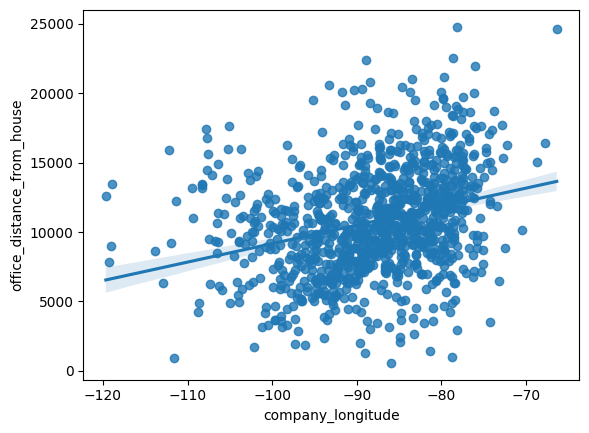

In [11]:
sns.regplot(x = "company_longitude", y = "office_distance_from_house", data = df)

## company_latitude dan overtime_hour

Pada peubah company_latitude dan overtime_hour, terdapat hubungan bahwa semakin besar company_latitude maka rata rata overtime_hour akan semakin menurun.

<AxesSubplot:xlabel='company_latitude', ylabel='overtime_hour'>

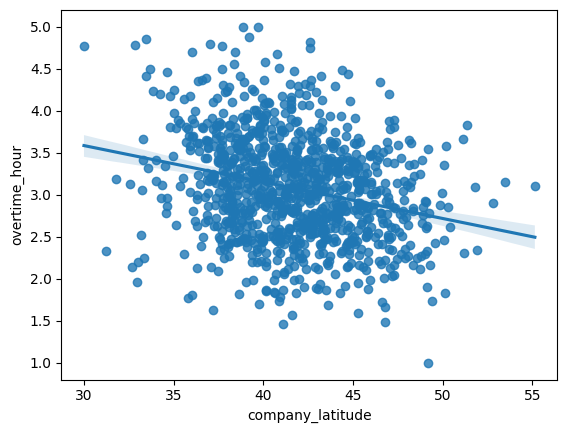

In [13]:
sns.regplot(x = "company_latitude", y = "overtime_hour", data = df)

## Mengubah Longitude dan Latitude menjadi Lokasi Sebenarnya

Longitude dan latitude merupakan garis khayal yang membentuk titik koordinat sebuah lokasi tempat perusahaan berada di bumi. Dengan menggunakan library geopy, didapatkan alamat lokasi dari setiap titik company_longitude dan company_latitude sebagai berikut.

In [9]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

latlon = []
for i in tqdm(df.index):
    latlons = (df['company_latitude'][i], df['company_longitude'][i])
    latlon.append(latlons)

location = []
for coord in tqdm(latlon):
    location.append(geolocator.reverse(str(coord[0])+","+str(coord[1])))

location

100%|██████████████████████████████████████████████████████████████████████████████| 1033/1033 [08:38<00:00,  1.99it/s]


[Location(South Columbia Rd 33, Columbia County, Arkansas, 71770, United States, (33.30844261369538, -93.32556029065063, 0.0)),
 Location(Pratt County, Kansas, United States, (37.6280602, -98.7485305, 0.0)),
 Location(25803, Hofheimer Way, Oakhill, Dinwiddie County, Virginia, 23803, United States, (37.1774883, -77.4439668, 0.0)),
 Location(North 11-3/4 Road, Mesick, Springville Township, Wexford County, Michigan, United States, (44.4075109646602, -85.70294440908734, 0.0)),
 Location(Falls Road, Moreland Hills, Chagrin Falls Township, Cuyahoga County, Ohio, 44022, United States, (41.454986, -81.403437, 0.0)),
 Location(E1630 Road, Pushmataha County, Oklahoma, 74521, United States, (34.650966, -95.068373, 0.0)),
 Location(D'Alembert, Rouyn-Noranda, Abitibi-Témiscamingue, Québec, Canada, (48.364674199999996, -79.2446083586203, 0.0)),
 Location(Porcupine District, Oglala Lakota County, South Dakota, 57772, United States, (43.3044385, -102.34388092172621, 0.0)),
 Location(Timmins, Cochrane 

Hasil diatas menunjukkan alamat lengkap dari sebuah lokasi. Secara sekilas, terlihat bahwa lokasi tersebut seluruhnya berada di Amerika Serikat. 

Peubah baru dapat ditambahkan ke dalam dataset yaitu peubah state (negara bagian) tempat perusahaan tersebut berada.

In [17]:
address = []

for loc in tqdm(location):
    try:
        address.append(loc.raw['address']['state'])
    except:
        address.append('NA')

100%|██████████████████████████████████████████████████████████████████████████| 1033/1033 [00:00<00:00, 719839.85it/s]


In [12]:
address

['Arkansas',
 'Kansas',
 'Virginia',
 'Michigan',
 'Ohio',
 'Oklahoma',
 'Québec',
 'South Dakota',
 'Ontario',
 'NA',
 'Kansas',
 'Iowa',
 'Wisconsin',
 'Wisconsin',
 'Missouri',
 'North Dakota',
 'Pennsylvania',
 'Ontario',
 'Kentucky',
 'Michigan',
 'Missouri',
 'Ontario',
 'Indiana',
 'Pennsylvania',
 'North Dakota',
 'North Carolina',
 'Delaware',
 'Michigan',
 'Illinois',
 'Michigan',
 'Wisconsin',
 'West Virginia',
 'North Carolina',
 'Iowa',
 'New York',
 'Wisconsin',
 'Colorado',
 'Missouri',
 'Michigan',
 'Michigan',
 'Wisconsin',
 'Minnesota',
 'Virginia',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'Michigan',
 'North Dakota',
 'Colorado',
 'Texas',
 'Nebraska',
 'Michigan',
 'New York',
 'Illinois',
 'Illinois',
 'Ontario',
 'Oklahoma',
 'Missouri',
 'Virginia',
 'Iowa',
 'Wisconsin',
 'Ohio',
 'Missouri',
 'Ohio',
 'Colorado',
 'Missouri',
 'Pennsylvania',
 'Michigan',
 'Québec',
 'Ohio',
 'Wisconsin',
 'Michigan',
 'Michigan',
 'Ontario',
 'Montana',
 'Michigan',
 'Québec',
 'O

In [18]:
df['state'] = address

In [19]:
df['state'].unique()

array(['Arkansas', 'Kansas', 'Virginia', 'Michigan', 'Ohio', 'Oklahoma',
       'Québec', 'South Dakota', 'Ontario', 'NA', 'Iowa', 'Wisconsin',
       'Missouri', 'North Dakota', 'Pennsylvania', 'Kentucky', 'Indiana',
       'North Carolina', 'Delaware', 'Illinois', 'West Virginia',
       'New York', 'Colorado', 'Minnesota', 'Texas', 'Nebraska',
       'Montana', 'Wyoming', 'California', 'New Mexico', 'Tennessee',
       'Maryland', 'Vermont', 'Alabama', 'Utah', 'South Carolina',
       'Arizona', 'Mississippi', 'New Jersey', 'Idaho'], dtype=object)

## Visualisasi Lokasi Perusahaan pada Peta

Berikut adalah visualisasi setiap lokasi perusahaan pada peta. Visualisasi ini dihasilkan dengan menggunakan library folium. Warna tag hijau menandakan churn bernilai 0, sementara tag merah menandakan churn bernilai 1.

In [21]:
latlon = []
for i in df.index:
    latlons = (df['company_latitude'][i], df['company_longitude'][i], df['churn'][i])
    latlon.append(latlons)
mapit = folium.Map( location=[37.0902, -95.7129], zoom_start=3 )
for coord in latlon:
    if coord[2] == 1:
        folium.Marker( location=[ coord[0], coord[1] ], fill_color='#ff0000', radius=1, icon=folium.Icon(color="red")).add_to( mapit )
    else:
        folium.Marker( location=[ coord[0], coord[1] ], fill_color='#00ff00', radius=1, icon=folium.Icon(color="green")).add_to( mapit )

mapit.save( 'map.html')
mapit

Berdasarkan visualisasi peta, didapatkan informasi sebagai berikut :

- Semakin ke barat, maka peluang churn rate bernilai 0 semakin besar.

Proses mendapatkan alamat dengan geopy membutuhkan waktu, sehingga dataset dengan tambahan peubah state disimpan terlebih dahulu agar proses mendapatkan alamat dengan geopy tidak perlu lagi dilakukan.

In [20]:
df.to_csv('data_with_state.csv', index = False)

# Data Preprocessing

Berikut adalah dataset baru dengan peubah state.

In [24]:
df_state = pd.read_csv('data_with_state.csv')
df_state.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn,state
0,8511.0,42.51,1.0,2,3.416556,33.309014,-93.330348,0,0,Arkansas
1,10090.0,57.48,2.0,2,2.897149,37.678983,-98.968097,0,0,Kansas
2,18652.0,41.22,2.0,2,3.180264,37.175891,-77.442812,1,1,Virginia
3,13392.0,63.57,3.0,2,3.429648,44.408084,-85.703296,0,0,Michigan
4,13356.0,46.16,2.0,2,3.812226,41.454702,-81.404655,1,1,Ohio


Dengan adanya informasi berupa state, kita tidak lagi memerlukan peubah company_longitude dan company_latitude. Kedua peubah tersebut dapat disingkirkan dari dataset.

In [25]:
df_state.drop(['company_latitude', 'company_longitude'], axis = 1, inplace = True)

Peubah state yang berupa peubah kategorik dengan tipe data string dan memiliki banyak unique value dilakukan one hot encoding. Proses one hot encoding dapat dilakukan dengan method get_dummies dari pandas.

In [26]:
state = pd.get_dummies(df_state['state'])

Berikut adalah hasil one hot encoding peubah state.

In [28]:
state

,Alabama,Arizona,Arkansas,California,Colorado,Delaware,Idaho,Illinois,Indiana,Iowa,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,West Virginia,Wisconsin,Wyoming
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1029,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dalam melakukan one hot encoding, perlu dilakukan pembuangan salah satu nilai unique dari peubah yang dilakukan one hot encoding. Hal ini dilakukan untuk mengurangi multikoliniearitas.

In [30]:
state.drop(['Wyoming'], axis = 1, inplace = True)


KeyboardInterrupt



Gabungkan hasil one hot encoding ke dalam dataset dan singkirkan peubah state.

In [31]:
df_state = pd.concat([df_state, state], axis = 1)

In [32]:
df_state.drop(['state'], axis = 1, inplace = True)

# Modelling

Sebelum tahapan modelling dilakukan, dataset dipisahkan menjadi data latih dan data uji dengan proporsi untuk data uji adalah 33% dari data latih.

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_state, test_size = 0.33)

Peubah respon dipisahkan dari dataset sebelum dilakukan modelling.

In [34]:
y_train = train['churn']
y_test = test['churn']

In [35]:
train.drop(['churn'], axis = 1, inplace = True)
test.drop(['churn'], axis = 1, inplace = True)

Model yang digunakan adalah model random forest dengan cross validation sebanyak 10 kali.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

rf = RandomForestClassifier()
rf.fit(train, y_train)
y_pred = cross_val_predict(rf, test, y_test, cv=10)

Dengan model random forest yang digunakan, didapatkan akurasi dan confusion matrix sebagai berikut.

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9237536656891495

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y_test)

array([[227,  14],
       [ 12,  88]], dtype=int64)

### Jawaban:

#### Nomor 1.

Berikut adalah insights yang saya temui:
- Apabila job_satisfaction > 3, maka churn bernilai 0.
- Apabila bonus_salary_percentage berada kurang lebih dibawah 30, maka churn bernilai 1.
- bonus_salary_percentage tertinggi didapatkan oleh karyawan dengan tingkat pendidikan SMA.
- bonus_salary_percentage tertinggi dan terendah didapatkan oleh wanita.
- Semakin tinggi job_satisfaction, semakin rendah rata rata overtime_hour.
- Tidak ada churn bernilai 1 pada company_longitude dibawah -100.
- Pada peubah company_longitude dan bonus_salary_percentage, terdapat hubungan bahwa semakin besar company_longitude maka rata rata bonus_salary_percentage akan semakin menurun.
- Pada peubah company_latitude dan bonus_salary_percentage, terdapat hubungan bahwa semakin besar company_latitude maka rata rata bonus_salary_percentage akan semakin meningkat.
- Pada peubah company_longitude dan office_distance_from_house, terdapat hubungan bahwa semakin besar company_longitude maka rata rata office_distance_from_house akan semakin meningkat.
- Pada peubah company_latitude dan overtime_hour, terdapat hubungan bahwa semakin besar company_latitude maka rata rata overtime_hour akan semakin menurun.
- Berdasarkan visualisasi peta, semakin ke barat, maka peluang churn rate bernilai 0 semakin besar.

#### Nomor 2.

- Saya melakukan pengubahan nilai pada peubah education_level dari tipe data string menjadi tipe data integer karena komputer tidak dapat memproses peubah dengan tipe data string. Peubah education_level tidak dilakukan one hot encoding karena peubah tersebut bersifat ordinal. 
- Saya melakukan penambahan peubah baru pada dataset yaitu peubah state. Peubah ini ditambahkan untuk menggantikan peubah company_latitude dan company_longitude. 
- Saya melakukan one hot encoding untuk peubah state. Setiap nilai unik dari peubah dijadikan sebagai sebuah peubah pada dataset.

#### Nomor 3.

- False Positive dari kasus ini adalah __.
- False Negative dari kasus ini adalah __.
- Dalam kasus ini, tipe 'kesalahan' yang lebih penting untuk diperhatikan adalah __ karena __.

#### Nomor 4.

- Saya menggunakan Machine Learning Model: Random Forest.
- Untuk mengevaluasi model tersebut, saya menggunakan metrik: Accuracy dan Confusion Matrix.
- Hasil evaluasi dari model tersebut adalah sebagai berikut:
    - Accuracy : 0.9237